# Credit Score Prediction System

# Data Analysis

## Steps in EDA

1. **Understand the Dataset**
    - Load the dataset (CSV, JSON, SQL, etc.)
    - Check the dimensions (number of rows and columns)
    - Display the first few rows

2. **Check for Missing Values**
    - Count missing values per column
    - Visualize missing values (heatmaps, bar charts)
    - Handle missing data (drop, impute, or fill)

3. **Check Data Types and Summary Statistics**
    - Identify numerical vs categorical features
    - Use `.describe()` for numerical summary
    - Use `.value_counts()` for categorical features

4. **Identify and Handle Outliers**
    - Use box plots, histograms, or scatter plots
    - Apply IQR, Z-score, or Winsorization to handle outliers

5. **Analyze Distribution of Features**
    - Use histograms, KDE plots, or probability plots
    - Check skewness and kurtosis

6. **Check for Data Imbalance**
    - Identify class distribution in classification problems
    - Use bar plots or pie charts for categorical variables

7. **Feature Correlation Analysis**
    - Compute correlation matrix
    - Use heatmaps to visualize relationships
    - Check for multicollinearity (VIF)

8. **Bivariate and Multivariate Analysis**
    - Scatter plots, pair plots for relationships
    - Box plots and violin plots for category-based analysis

9. **Dimensionality Reduction (Optional)**
    - PCA, t-SNE, or UMAP for visualization in 2D/3D
    - Identify redundant features

10. **Feature Engineering & Transformation**
     - Create new features from existing ones
     - Normalize/scale numerical features
     - Encode categorical features (One-Hot, Label Encoding)

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import shap
import lime.lime_tabular
from sklearn.utils.class_weight import compute_class_weight
from fairlearn.metrics import selection_rate
from aif360.sklearn.metrics import disparate_impact_ratio, statistical_parity_difference
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

In [88]:
# Load Dataset
file_path = "BankChurners.csv"
df = pd.read_csv(file_path)
dfModel = df.copy()

In [89]:
# Drop unnecessary columns (Client ID and Naive Bayes columns)
df.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)


## Step 1: Understand the Dataset

In [90]:
#Rename the columns
df.rename(columns={
    "Attrition_Flag": "Customer_Status",
    "Customer_Age": "Age",
    "Gender": "Sex",
    "Dependent_count": "Dependents",
    "Education_Level": "Education",
    "Marital_Status": "Marital_Status",
    "Income_Category": "Income_Range",
    "Card_Category": "Credit_Card_Type",
    "Months_on_book": "Account_Tenure_Months",
    "Total_Relationship_Count": "Total_Products_Held",
    "Months_Inactive_12_mon": "Inactive_Months_Last_Year",
    "Contacts_Count_12_mon": "Customer_Contacts_Last_Year",
    "Credit_Limit": "Credit_Limit_Amount",
    "Total_Revolving_Bal": "Revolving_Balance",
    "Avg_Open_To_Buy": "Available_Credit",
    "Total_Amt_Chng_Q4_Q1": "Transaction_Amount_Change_Rate",
    "Total_Trans_Amt": "Total_Transaction_Amount",
    "Total_Trans_Ct": "Total_Transaction_Count",
    "Total_Ct_Chng_Q4_Q1": "Transaction_Count_Change_Rate",
    "Avg_Utilization_Ratio": "Credit_Utilization_Ratio"}, inplace=True)

print(df.head())


     Customer_Status  Age Sex  Dependents    Education Marital_Status  \
0  Existing Customer   45   M           3  High School        Married   
1  Existing Customer   49   F           5     Graduate         Single   
2  Existing Customer   51   M           3     Graduate        Married   
3  Existing Customer   40   F           4  High School        Unknown   
4  Existing Customer   40   M           3   Uneducated        Married   

     Income_Range Credit_Card_Type  Account_Tenure_Months  \
0     $60K - $80K             Blue                     39   
1  Less than $40K             Blue                     44   
2    $80K - $120K             Blue                     36   
3  Less than $40K             Blue                     34   
4     $60K - $80K             Blue                     21   

   Total_Products_Held  Inactive_Months_Last_Year  \
0                    5                          1   
1                    6                          1   
2                    4             

In [91]:

print("Dataset Dimensions:", df.shape)
print("First 5 Rows:")
print(df.head())

Dataset Dimensions: (10127, 20)
First 5 Rows:
     Customer_Status  Age Sex  Dependents    Education Marital_Status  \
0  Existing Customer   45   M           3  High School        Married   
1  Existing Customer   49   F           5     Graduate         Single   
2  Existing Customer   51   M           3     Graduate        Married   
3  Existing Customer   40   F           4  High School        Unknown   
4  Existing Customer   40   M           3   Uneducated        Married   

     Income_Range Credit_Card_Type  Account_Tenure_Months  \
0     $60K - $80K             Blue                     39   
1  Less than $40K             Blue                     44   
2    $80K - $120K             Blue                     36   
3  Less than $40K             Blue                     34   
4     $60K - $80K             Blue                     21   

   Total_Products_Held  Inactive_Months_Last_Year  \
0                    5                          1   
1                    6                    

## Step 2: Check for Missing Values

In [92]:

print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Customer_Status                   0
Age                               0
Sex                               0
Dependents                        0
Education                         0
Marital_Status                    0
Income_Range                      0
Credit_Card_Type                  0
Account_Tenure_Months             0
Total_Products_Held               0
Inactive_Months_Last_Year         0
Customer_Contacts_Last_Year       0
Credit_Limit_Amount               0
Revolving_Balance                 0
Available_Credit                  0
Transaction_Amount_Change_Rate    0
Total_Transaction_Amount          0
Total_Transaction_Count           0
Transaction_Count_Change_Rate     0
Credit_Utilization_Ratio          0
dtype: int64


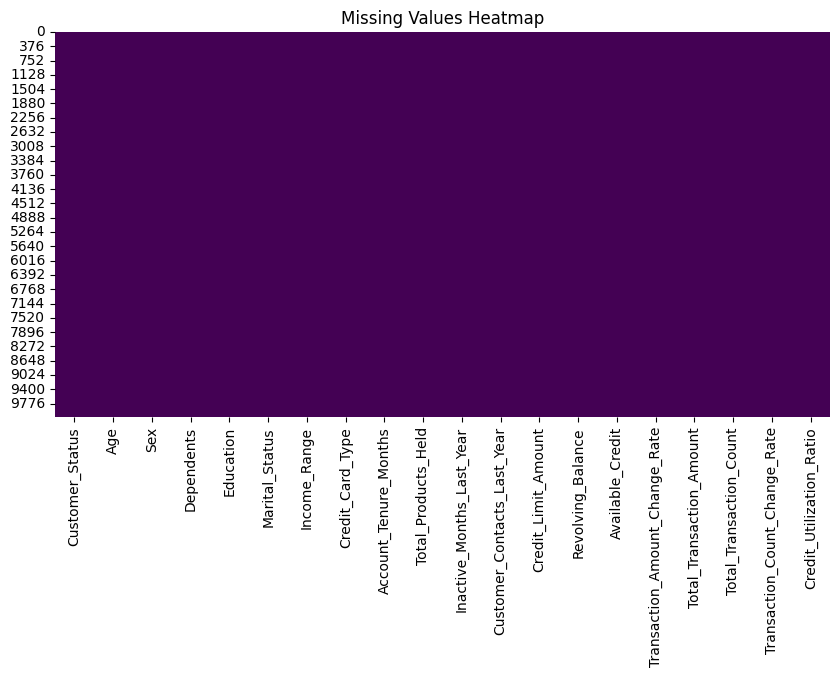

In [93]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Step 3: Check Data Types and Summary Statistics

In [94]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Customer_Status                    object
Age                                 int64
Sex                                object
Dependents                          int64
Education                          object
Marital_Status                     object
Income_Range                       object
Credit_Card_Type                   object
Account_Tenure_Months               int64
Total_Products_Held                 int64
Inactive_Months_Last_Year           int64
Customer_Contacts_Last_Year         int64
Credit_Limit_Amount               float64
Revolving_Balance                   int64
Available_Credit                  float64
Transaction_Amount_Change_Rate    float64
Total_Transaction_Amount            int64
Total_Transaction_Count             int64
Transaction_Count_Change_Rate     float64
Credit_Utilization_Ratio          float64
dtype: object


In [95]:
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
                Age    Dependents  Account_Tenure_Months  Total_Products_Held  \
count  10127.000000  10127.000000           10127.000000         10127.000000   
mean      46.325960      2.346203              35.928409             3.812580   
std        8.016814      1.298908               7.986416             1.554408   
min       26.000000      0.000000              13.000000             1.000000   
25%       41.000000      1.000000              31.000000             3.000000   
50%       46.000000      2.000000              36.000000             4.000000   
75%       52.000000      3.000000              40.000000             5.000000   
max       73.000000      5.000000              56.000000             6.000000   

       Inactive_Months_Last_Year  Customer_Contacts_Last_Year  \
count               10127.000000                 10127.000000   
mean                    2.341167                     2.455317   
std                     1.01062

In [96]:
print("\nValue Counts for Categorical Features:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


Value Counts for Categorical Features:

Customer_Status Value Counts:
Customer_Status
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Sex Value Counts:
Sex
F    5358
M    4769
Name: count, dtype: int64

Education Value Counts:
Education
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Marital_Status Value Counts:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Income_Range Value Counts:
Income_Range
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Credit_Card_Type Value Counts:
Credit_Card_Type
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


## Step 4: Identify and Handle Outliers

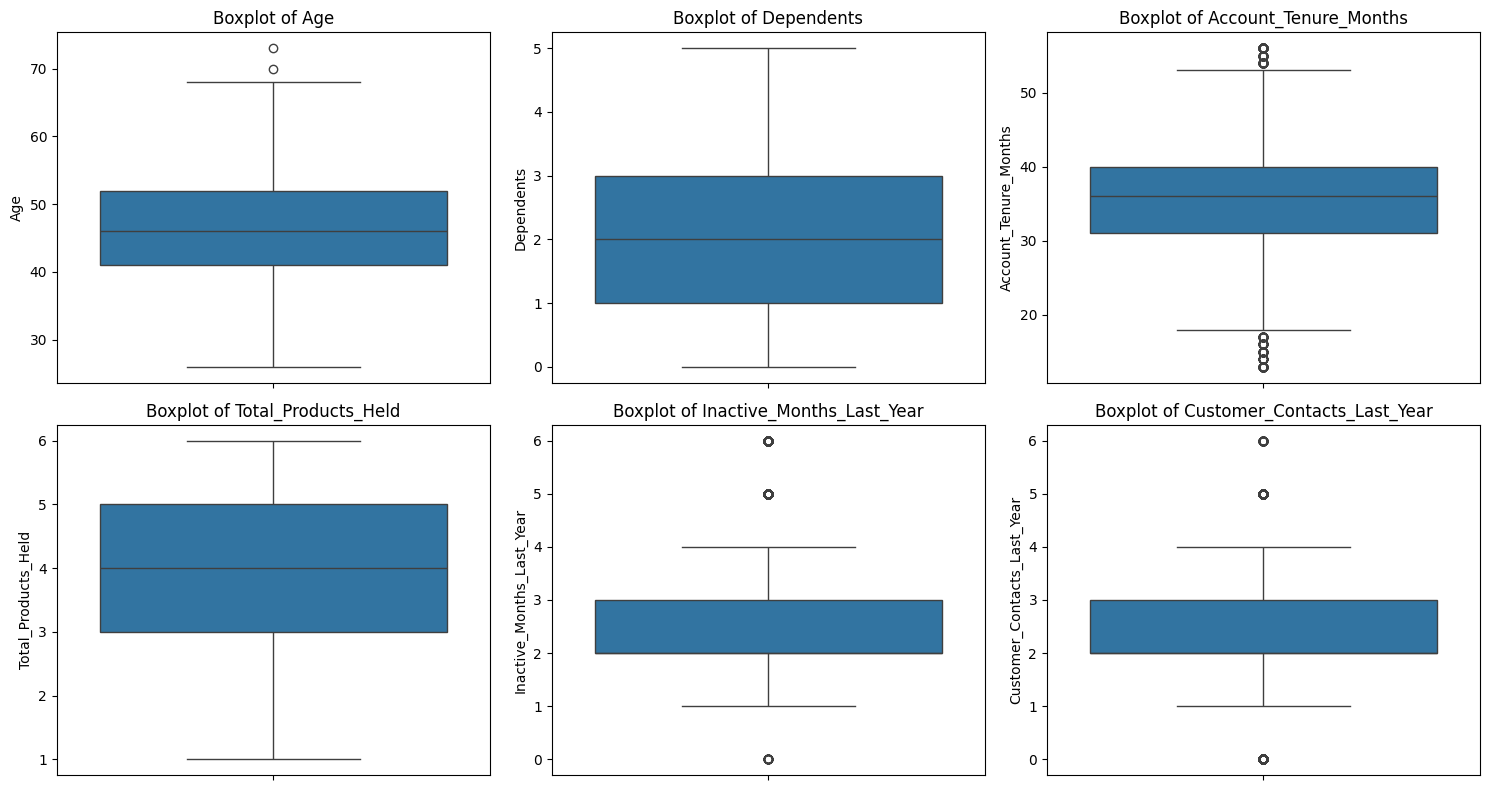

In [97]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Outlier Handling using IQR

In [98]:
# Outlier Handling using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

In [99]:
#This code snippet is performing outlier detection using the Interquartile Range (IQR) method 
# for each numeric column in a DataFrame. Here's a breakdown of what the code is doing:
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Identifying Outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Data outliers in column '{column}':")
    print(outliers[[column]])
    print("\n")
    
    outliers_df = pd.DataFrame()

for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    outliers_df = pd.concat([outliers_df, outliers])


print("All outliers in the dataset:")
#Outliers count in the dataset
print(outliers_df.shape)
# print(outliers_df)

Data outliers in column 'Age':
Empty DataFrame
Columns: [Age]
Index: []


Data outliers in column 'Dependents':
Empty DataFrame
Columns: [Dependents]
Index: []


Data outliers in column 'Account_Tenure_Months':
Empty DataFrame
Columns: [Account_Tenure_Months]
Index: []


Data outliers in column 'Total_Products_Held':
Empty DataFrame
Columns: [Total_Products_Held]
Index: []


Data outliers in column 'Inactive_Months_Last_Year':
Empty DataFrame
Columns: [Inactive_Months_Last_Year]
Index: []


Data outliers in column 'Customer_Contacts_Last_Year':
Empty DataFrame
Columns: [Customer_Contacts_Last_Year]
Index: []


Data outliers in column 'Credit_Limit_Amount':
Empty DataFrame
Columns: [Credit_Limit_Amount]
Index: []


Data outliers in column 'Revolving_Balance':
Empty DataFrame
Columns: [Revolving_Balance]
Index: []


Data outliers in column 'Available_Credit':
Empty DataFrame
Columns: [Available_Credit]
Index: []


Data outliers in column 'Transaction_Amount_Change_Rate':
Empty DataFrame


## Step 5: Analyze Distribution of Features

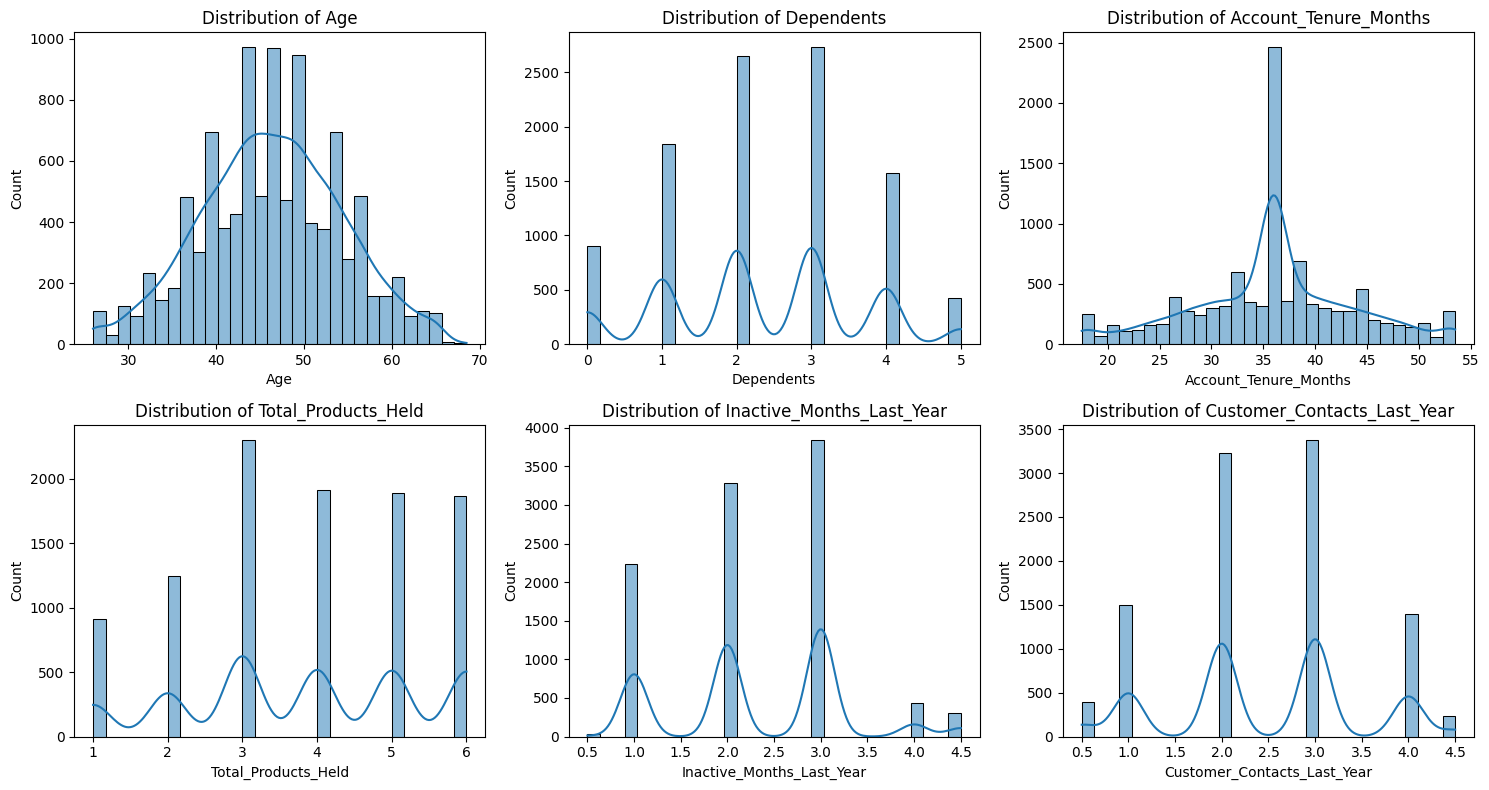

In [100]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Categorical Feature Analysis

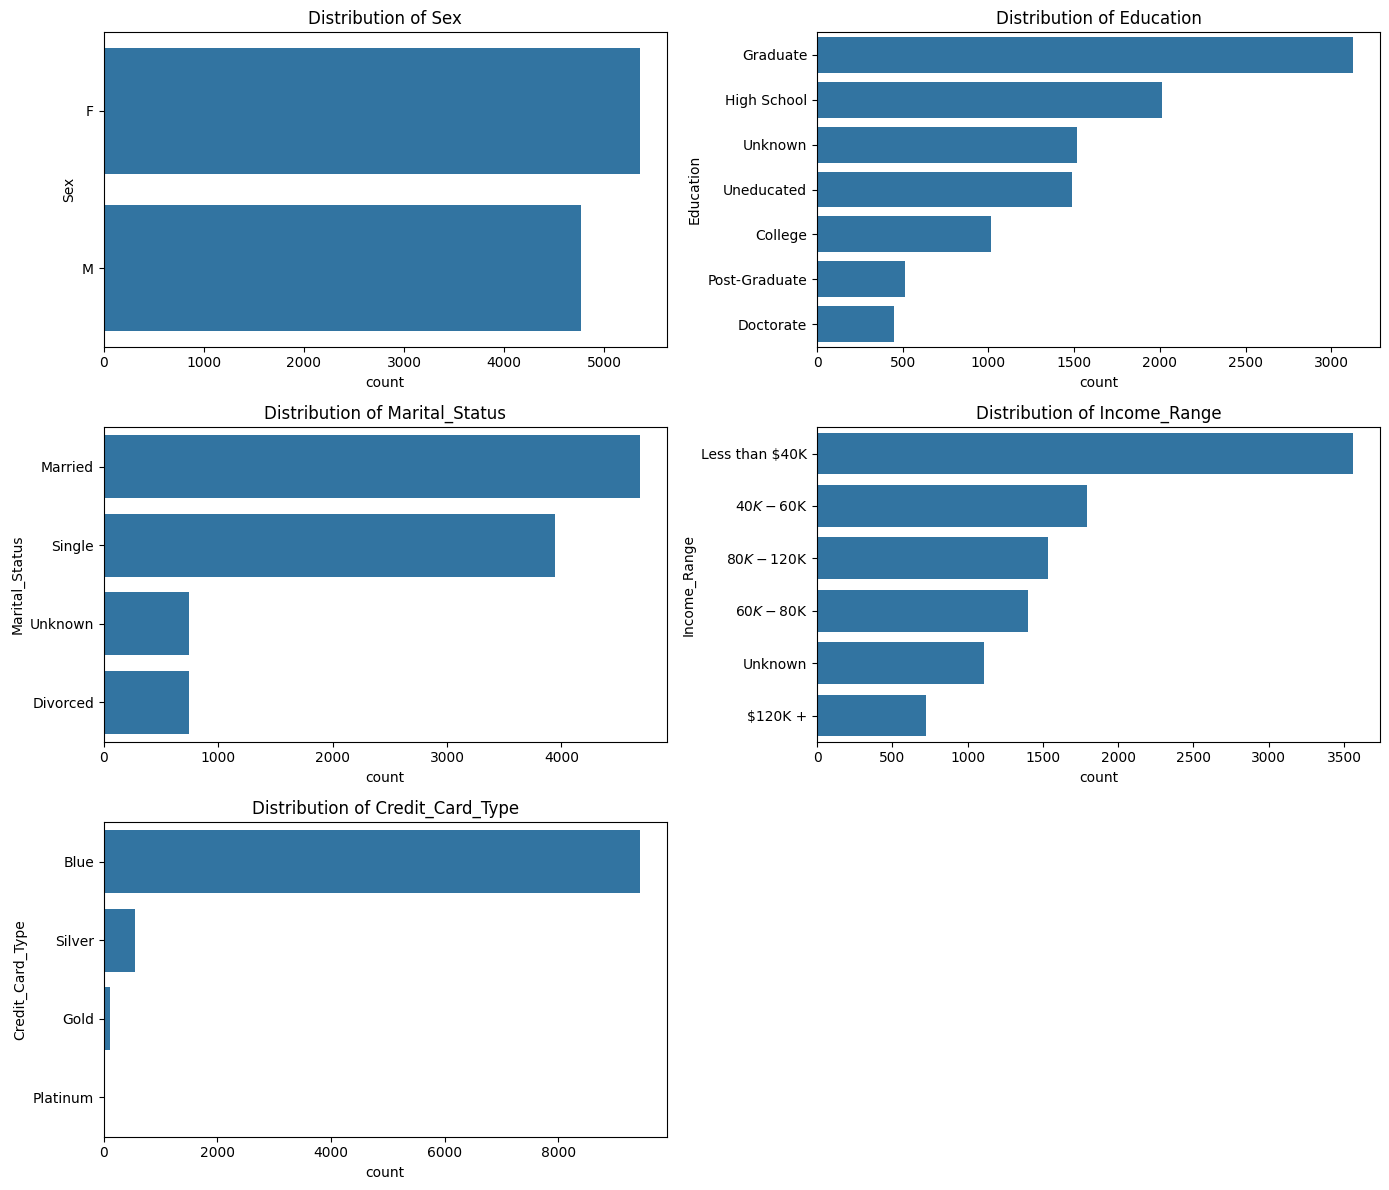

In [101]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Customer_Status')  # Exclude target variable

# Plot categorical distributions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Categorical Feature Analysis

**Gender:**
- Slightly more female customers than male.

**Education Level:**
- Most customers have "Graduate" or "High School" education.
- "Unknown" exists, indicating potential missing or unreported data.

**Marital Status:**
- "Married" is the most common status, followed by "Single" and "Unknown."

**Income Category:**
- The majority of customers fall under "Less than $40K" and "$40K-$60K," indicating a customer base with moderate income levels.

**Card Category:**
- The vast majority of customers hold "Blue" cards, with very few using other card types.

# Check skewness and kurtosis

In [102]:
#This code snippet is iterating over each column specified in the `num_cols` list and printing out the skewness and kurtosis values for each column in a formatted string. The `skew()` function calculates the skewness of the data in the column, while the `kurtosis()` function calculates the kurtosis. The output will display the column name followed by its skewness and kurtosis values with two decimal places.
for col in num_cols:
    print(f"\n{col}: Skewness={df[col].skew():.2f}, Kurtosis={df[col].kurtosis():.2f}")


Age: Skewness=-0.04, Kurtosis=-0.29

Dependents: Skewness=-0.02, Kurtosis=-0.68

Account_Tenure_Months: Skewness=-0.06, Kurtosis=0.07

Total_Products_Held: Skewness=-0.16, Kurtosis=-1.01

Inactive_Months_Last_Year: Skewness=0.14, Kurtosis=-0.59

Customer_Contacts_Last_Year: Skewness=-0.03, Kurtosis=-0.77

Credit_Limit_Amount: Skewness=1.20, Kurtosis=0.09

Revolving_Balance: Skewness=-0.15, Kurtosis=-1.15

Available_Credit: Skewness=1.19, Kurtosis=0.07

Transaction_Amount_Change_Rate: Skewness=0.33, Kurtosis=0.13

Total_Transaction_Amount: Skewness=0.84, Kurtosis=-0.03

Total_Transaction_Count: Skewness=0.15, Kurtosis=-0.37

Transaction_Count_Change_Rate: Skewness=0.13, Kurtosis=0.09

Credit_Utilization_Ratio: Skewness=0.72, Kurtosis=-0.79


# Step 6: Check for Data Imbalance

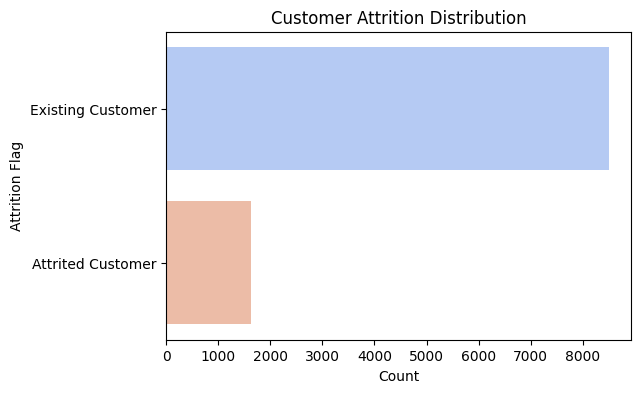

In [103]:
plt.figure(figsize=(6, 4))
sns.countplot(y=df["Customer_Status"], hue=df["Customer_Status"], order=df["Customer_Status"].value_counts().index, palette="coolwarm", legend=False)
plt.title("Customer Attrition Distribution")
plt.xlabel("Count")
plt.ylabel("Attrition Flag")
plt.show()

# Step 7: Feature Correlation Analysis

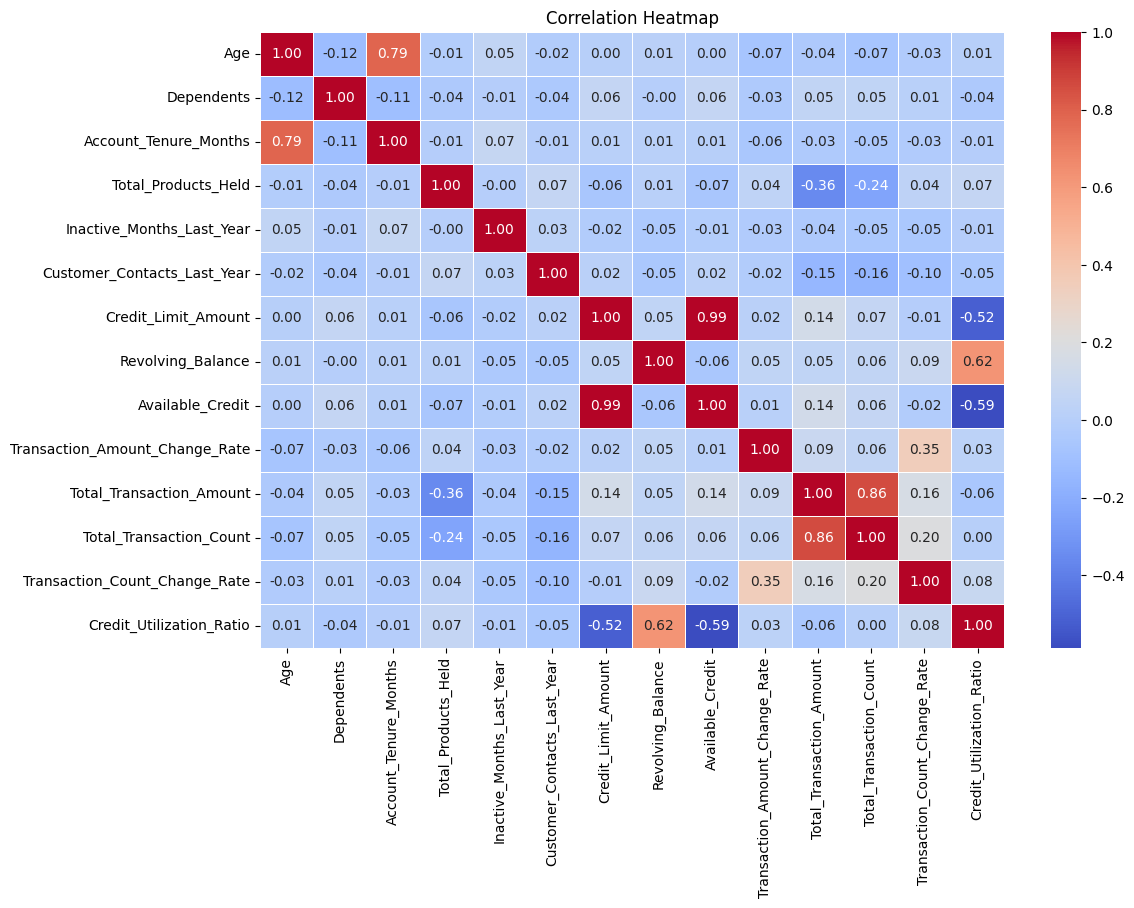

In [104]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Check for Multicollinearity using VIF

In [105]:
#This code snippet is calculating the Variance Inflation Factor (VIF) for numerical features in a DataFrame. Here's a breakdown of what each part of the code is doing:
vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols
vif_data["VIF"] = [variance_inflation_factor(df[num_cols].values, i) for i in range(len(num_cols))]
print("\nVariance Inflation Factor (VIF) for Features:")
print(vif_data)


Variance Inflation Factor (VIF) for Features:
                           Feature          VIF
0                              Age    76.890255
1                       Dependents     4.053150
2            Account_Tenure_Months    59.283540
3              Total_Products_Held     7.770886
4        Inactive_Months_Last_Year     6.832643
5      Customer_Contacts_Last_Year     6.308345
6              Credit_Limit_Amount  2243.883240
7                Revolving_Balance    32.909362
8                 Available_Credit  1949.936341
9   Transaction_Amount_Change_Rate    17.960833
10        Total_Transaction_Amount    19.036843
11         Total_Transaction_Count    33.084357
12   Transaction_Count_Change_Rate    15.999776
13        Credit_Utilization_Ratio     7.163331


# Step 8: Bivariate and Multivariate Analysis

<Figure size 1200x800 with 0 Axes>

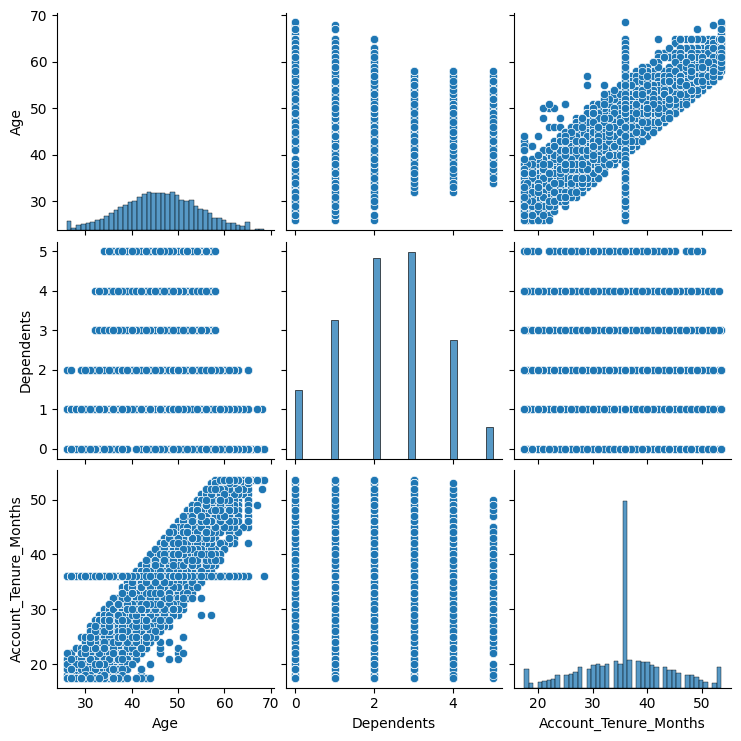

In [106]:

plt.figure(figsize=(12, 8))
sns.pairplot(df[num_cols[:3]])  # Plot only the first 3 numerical columns
plt.show()

# Step 9: Dimensionality Reduction (PCA for first 2 components)

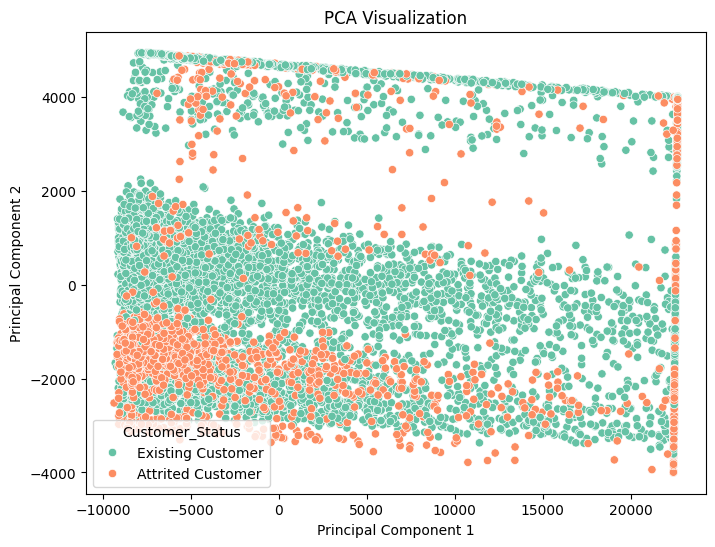

In [107]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[num_cols])
df["PCA_1"] = pca_result[:, 0]
df["PCA_2"] = pca_result[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA_1"], y=df["PCA_2"], hue=df["Customer_Status"], palette="Set2")
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [108]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio of Principal Components: {explained_variance}")

Explained Variance Ratio of Principal Components: [0.94939674 0.04182337]


### PCA Visualization Explanation and Observation

**Explanation:**
- The graph is a scatter plot that visualizes the first two principal components obtained from PCA (Principal Component Analysis).
- Each point in the scatter plot represents a customer, with the x-axis representing the first principal component (PCA_1) and the y-axis representing the second principal component (PCA_2).
- The points are colored based on the `Customer_Status` feature, which indicates whether the customer is an existing customer or an attrited customer.

**Observations:**
1. **Separation of Classes:**
    - The scatter plot shows a clear separation between existing customers and attrited customers in the PCA space.
    - This indicates that the PCA transformation has effectively captured the variance in the data that distinguishes between these two classes.

2. **Clusters:**
    - There are distinct clusters of points within each class, suggesting that there may be subgroups or patterns within the existing and attrited customers.
    - Further analysis could be done to understand the characteristics of these clusters.

3. **Variance Explained:**
    - The first two principal components capture a significant amount of the variance in the data, as evidenced by the clear separation and clustering of points.
    - However, it is important to check the explained variance ratio to quantify how much of the total variance is captured by these two components.

4. **Outliers:**
    - There are some points that are far away from the main clusters, which could be potential outliers.
    - These outliers may need to be investigated further to understand their impact on the model and analysis.

Overall, the PCA visualization provides a useful summary of the data, highlighting the separation between existing and attrited customers and revealing potential patterns and outliers.

# Customer Attrition Analysis  - Customer Statuses

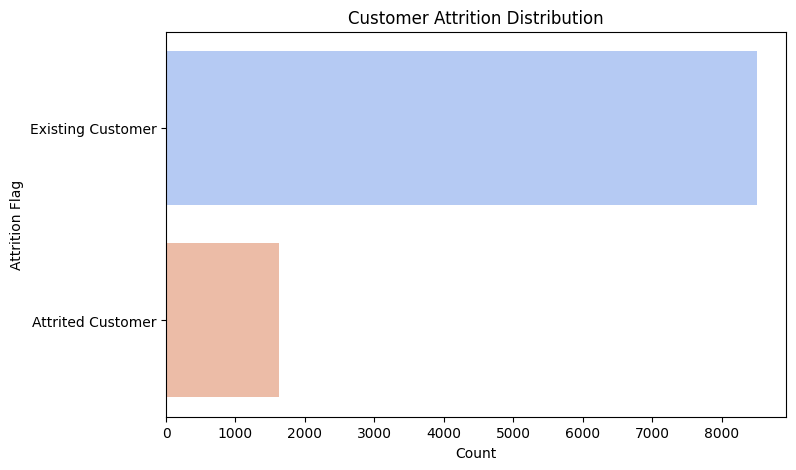

Customer_Status
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [109]:
# Plot target variable distribution (Customer_Status)
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Customer_Status"], hue=df["Customer_Status"], order=df["Customer_Status"].value_counts().index, palette="coolwarm", legend=False)
plt.title("Customer Attrition Distribution")
plt.xlabel("Count")
plt.ylabel("Attrition Flag")
plt.show()

# Display class distribution
df["Customer_Status"].value_counts(normalize=True)


# Customer Attrition Analysis

**Highly Imbalanced Target Variable:**
- 83.9% of customers are Existing Customers.
- 16.1% of customers are Attrited Customers (churned).

**Potential Issue:**
- The dataset is imbalanced, meaning a model might be biased towards predicting "Existing Customer."

**Recommended Actions:**
1. Use resampling techniques:
    - Oversampling (e.g., SMOTE)
    - Undersampling

2. Consider weighted loss functions to handle imbalance.

3. Use metrics like F1-score or AUC-ROC instead of accuracy for evaluation.

# Step 10: Feature Engineering & Transformation

In [110]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[cat_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))
df = df.drop(columns=cat_cols).reset_index(drop=True)
df = pd.concat([df, encoded_cats_df], axis=1)

# Step 11: Hyperparameter Tuning

In [111]:
X = df.drop(columns=['Customer_Status'])
y = df['Customer_Status']

# Define models for hyperparameter tuning
models = {
    "RandomForest": RandomForestClassifier(),
    #"LogisticRegression": LogisticRegression(),
    #"SVC": SVC()
}

# Define hyperparameters for tuning
param_grid = {
    "RandomForest": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20]},
    #"LogisticRegression": {"C": [0.1, 1, 10]},
    #"SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Perform GridSearchCV for each model

In [112]:
from sklearn.model_selection import GridSearchCV


for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 300}
Best score for RandomForest: 0.9250519054757292



In [113]:
# Load dataset
df = pd.read_csv("BankChurners.csv")


In [114]:
# Drop unnecessary columns
df = df.drop(columns=['CLIENTNUM', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])


In [115]:
# Encode categorical variables
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}
#Label encoding for categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Credit Score Calculation using FICO formula (simplified version)


Assuming 'Credit_Limit_Amount' and 'Credit_Utilization_Ratio' impact credit score

In [ ]:
fico_bins = [0, 300, 740, 850, np.inf]
fico_labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['Credit_Score_Category'] = pd.cut(df['Credit_Limit'] * (1 - df['Avg_Utilization_Ratio']), bins=fico_bins, labels=fico_labels)
le_class = LabelEncoder()
df['Credit_Score_Category'] = le_class.fit_transform(df['Credit_Score_Category'])
print(df['Credit_Score_Category'].value_counts())

In [116]:
# Compute Credit Score (FICO-like score)
df['Credit_Score'] = (
    (df['Total_Revolving_Bal'] * 0.35) + 
    (df['Total_Trans_Amt'] * 0.35) +
    (df['Avg_Utilization_Ratio'] * 0.3) +
    (df['Avg_Open_To_Buy'] * 0.3) +
    (df['Months_on_book'] * 0.15) +
    (df['Total_Relationship_Count'] * 0.1) +
    (df['Total_Ct_Chng_Q4_Q1'] * 0.1)
)


In [117]:
# Normalize Credit Score (FICO Scale: 300-850)
df['Credit_Score'] = 300 + (df['Credit_Score'] - df['Credit_Score'].min()) * (850 - 300) / (df['Credit_Score'].max() - df['Credit_Score'].min())

# Convert Credit Score into categories (e.g., Low, Medium, High)
df['Credit_Score_Category'] = pd.qcut(df['Credit_Score'], q=3, labels=['Low', 'Medium', 'High'])

# Define features and target
X = df.drop(columns=['Credit_Score', 'Credit_Score_Category'])
y = df['Credit_Score_Category']

# Model Training - Random Forest Classifier

In [118]:
# Encode target variable
y = LabelEncoder().fit_transform(y)


Train-Test Split

In [119]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from imblearn.over_sampling import SMOTE

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [121]:
# Standardize numerical features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Model Prediction

In [123]:
# Make predictions
y_pred = best_rf_model.predict(X_test)

In [124]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


# Model Evaluation

In [125]:
# Print results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9649555774925962
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       675
           1       0.96      0.96      0.96       672
           2       0.95      0.94      0.95       679

    accuracy                           0.96      2026
   macro avg       0.96      0.96      0.96      2026
weighted avg       0.96      0.96      0.96      2026



# Predict score for the test data

In [126]:
# Load new customer data for prediction
test_data = pd.read_csv("test_customer_data.csv")

# Apply same preprocessing steps
test_data = test_data.drop(columns=['CLIENTNUM', 'Predicted_Credit_Score'], errors='ignore')
for col in categorical_cols:
    if col in test_data.columns:
        test_data[col] = label_encoders[col].transform(test_data[col])

# Ensure all columns match trained features
test_data = test_data.reindex(columns=X.columns, fill_value=0)

# Standardize numerical features
test_data = scaler.transform(test_data)

# Predict credit score categories
test_predictions = best_rf_model.predict(test_data)

# Convert predictions back to labels
predicted_categories = LabelEncoder().fit(['Low', 'Medium', 'High']).inverse_transform(test_predictions)

# Add predictions to dataframe
test_results = pd.DataFrame({'Predicted_Credit_Score_Category': predicted_categories})

# Save predictions
#test_results.to_csv("/mnt/data/test_predictions.csv", index=False)

print(test_results.value_counts())

Predicted_Credit_Score_Category
High                               8
Medium                             2
Name: count, dtype: int64


### **Potential Risks in the Credit Score Prediction Model & Mitigation Strategies**

The **Random Forest-based Credit Score Prediction Model** faces several key risks, including **bias, data quality issues, adversarial attacks, and explainability concerns**. Below are the major risks and ways to mitigate them:

### **1. Data Imbalance Risk**
- **Risk:** The dataset may have more "Good" credit scores than "Bad" ones, leading to a bias where the model favors the majority class.
- **Mitigation:**
    - Use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance classes.
    - Use **class weighting** in Random Forest (`class_weight="balanced"`) to penalize misclassification of minority classes.

### **2. Bias & Fairness Risk**
- **Risk:** Certain demographic groups (e.g., income level, gender, education) may be unfairly penalized by the model, leading to **discriminatory predictions**.
- **Mitigation:**
    - Use **adversarial debiasing** or **reweighting** strategies to ensure fairness.
    - Implement **Equalized Odds** to ensure similar error rates across groups.
    - Use **SHAP (SHapley Additive Explanations)** to check if features like "Gender" disproportionately influence predictions.

### **3. Overfitting Risk**
- **Risk:** The model may memorize patterns in training data rather than learning generalizable trends, leading to poor performance on unseen data.
- **Mitigation:**
    - Use **cross-validation** (`cv=5`) to validate performance across multiple subsets.
    - Limit tree depth (`max_depth=10`) and reduce the number of trees (`n_estimators=200`) to prevent overfitting.
    - Use **feature selection** (drop highly correlated or redundant features).

### **4. Feature Leakage Risk**
- **Risk:** Some features may contain future information that is unavailable at the time of prediction, artificially inflating accuracy.
- **Example:** Using `Total_Trans_Amt` (total transaction amount) as a predictor when it is a result of credit behavior.
- **Mitigation:**
    - Perform **feature importance analysis** to detect and remove potential leaky features.
    - Use **only features available at loan application time**.

### **5. Adversarial Attacks & Fraud Risk**
- **Risk:** Attackers may manipulate input data (e.g., **falsify income or credit utilization**) to get favorable predictions.
- **Mitigation:**
    - Implement **anomaly detection** to flag suspicious inputs.
    - Use **adversarial training** to simulate and defend against attacks.
    - Apply **robust scaling and noise injection** to make the model less sensitive to small manipulations.

### **6. Model Explainability Risk**
- **Risk:** Random Forest models are harder to interpret than simple linear models, making it difficult for financial analysts to trust predictions.
- **Mitigation:**
    - Use **SHAP values** to explain which features impact predictions.
    - Generate **counterfactual explanations** (e.g., "If your credit utilization was 10% lower, your score would increase").
    - Provide a **fairness report** alongside predictions to detect disparities.


In [ ]:
# Convert X_test to DataFrame with the same columns as used in training
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Get Predictions ensuring no misalignment of feature names
y_pred = best_rf_model.predict(X_test_df.to_numpy())  # Convert to numpy array to match training input


In [145]:
print("Original Label Distribution in y_test:")
print(pd.Series(y_test).value_counts())

print("Predicted Label Distribution in y_pred:")
print(pd.Series(y_pred).value_counts())


Original Label Distribution in y_test:
0    675
1    675
2    675
Name: count, dtype: int64
Predicted Label Distribution in y_pred:
0    2025
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:

# Retrain the model
best_rf_model.fit(X_train_resampled, y_train_resampled)


In [153]:
# Extract Gender Before Encoding
protected_attribute = df.loc[X_test.index, 'Gender']  # Use index instead of entire DataFrame

# Ensure Gender is categorical (map numbers back to labels if needed)
if protected_attribute.dtype != 'O':  # If it's numerical
    protected_attribute = protected_attribute.map({0: "Male", 1: "Female"})

# Compute selection rates for Male & Female again
male_selection_rate = selection_rate(y_test[protected_attribute == "Male"], y_pred[protected_attribute == "Male"])
female_selection_rate = selection_rate(y_test[protected_attribute == "Female"], y_pred[protected_attribute == "Female"])

# Compute Disparate Impact Ratio
if male_selection_rate == 0 or female_selection_rate == 0:
    gender_disparate_impact = np.nan
    print("Warning: One of the gender groups has zero selection rate.")
else:
    gender_disparate_impact = female_selection_rate / male_selection_rate

print("Male Selection Rate:", male_selection_rate)
print("Female Selection Rate:", female_selection_rate)
print("Gender Disparate Impact Ratio:", gender_disparate_impact)


Male Selection Rate: 0.4446529080675422
Female Selection Rate: 0.21480709071949947
Gender Disparate Impact Ratio: 0.48308936436073086


# Handling Data Imbalance

In [128]:
print("Class Distribution Before SMOTE:", pd.Series(y).value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class Distribution After SMOTE:", pd.Series(y_resampled).value_counts())

Class Distribution Before SMOTE: 0    3376
1    3376
2    3375
Name: count, dtype: int64
Class Distribution After SMOTE: 0    3376
2    3376
1    3376
Name: count, dtype: int64


In [142]:
from fairlearn.metrics import demographic_parity_difference, selection_rate

# Extract Gender Before Encoding
protected_attribute = df.loc[X_test.index, 'Gender']  # Use index instead of entire DataFrame

# Ensure Gender is categorical (map numbers back to labels if needed)
if protected_attribute.dtype != 'O':  # If it's numerical
    protected_attribute = protected_attribute.map({0: "Male", 1: "Female"})

# Compute selection rates
selection_rate_male = selection_rate(y_test[protected_attribute == "Male"], rf_model.predict(X_test)[protected_attribute == "Male"])
selection_rate_female = selection_rate(y_test[protected_attribute == "Female"], rf_model.predict(X_test)[protected_attribute == "Female"])

# Compute disparate impact ratio manually
gender_disparate_impact = selection_rate_female / selection_rate_male if selection_rate_male != 0 else float('inf')

# Compute statistical parity difference
gender_statistical_parity = demographic_parity_difference(y_test, rf_model.predict(X_test), sensitive_features=protected_attribute)

print("Gender Disparate Impact Ratio:", gender_disparate_impact)
print("Gender Statistical Parity Difference:", gender_statistical_parity)


Gender Disparate Impact Ratio: 0.4737089883537264
Gender Statistical Parity Difference: 0.23401682881832428


# Handling Bias & Fairness

In [131]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_resampled), y=y_resampled)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42)

# Model Training with Cross-Validation

In [132]:
# Encode the target variable
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled_encoded):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled_encoded[train_idx], y_resampled_encoded[test_idx]
    rf_model.fit(X_train, y_train)
    y_pred_proba = rf_model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    auc_scores.append(auc)

print("Cross-Validated AUC Score:", np.mean(auc_scores))

Cross-Validated AUC Score: 0.9969711069805264


# Explainability using SHAP

 99%|===================| 6010/6075 [01:30<00:00]        

<Figure size 1200x800 with 0 Axes>

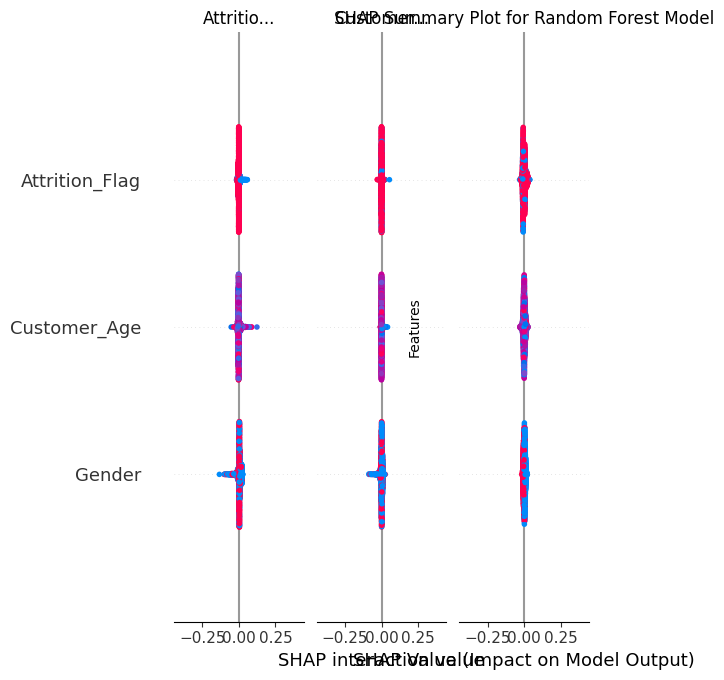

In [140]:
import shap
import matplotlib.pyplot as plt

# Ensure SHAP values are correctly computed for the model
explainer = shap.Explainer(rf_model, X_test)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Improve the SHAP summary plot visualization
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
shap.summary_plot(shap_values, X_test, plot_type="violin", alpha=0.7, show=False)  # Use violin plot for better readability
plt.title("SHAP Summary Plot for Random Forest Model")  # Add a title to the plot
plt.xlabel("SHAP Value (Impact on Model Output)")  # Add x-axis label
plt.ylabel("Features")  # Add y-axis label
plt.show()  # Display the plot

# Detecting Feature Leakage

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Adversarial Attack Detection (Anomaly Detection)

In [136]:
z_scores = np.abs(stats.zscore(X_resampled))
anomaly_threshold = 3
anomalies = (z_scores > anomaly_threshold).sum(axis=1) > 0
print("Potential Adversarial Samples Detected:", sum(anomalies))

Potential Adversarial Samples Detected: 1285


# Generate Fairness Report

In [137]:
grouped_results = df.groupby("Credit_Score_Category", observed=False)["Gender"].mean()
print("Fairness Report:")
print(grouped_results)

Fairness Report:
Credit_Score_Category
Low       0.316943
Medium    0.368889
High      0.726896
Name: Gender, dtype: float64


# -----------------------------
# 🎯 Attack: Adversarial Attack - Evasion (Trick the Model)
# -----------------------------

In [138]:
def generate_adversarial_example(original_input):
    """
    Modify key financial parameters (credit utilization, transaction amounts) 
    to fool the model into predicting a higher credit score.
    """
    adversarial_input = original_input.copy()
    
    # Reduce credit utilization significantly
    adversarial_input["Avg_Utilization_Ratio"] = max(0, adversarial_input["Avg_Utilization_Ratio"] - 2.0)
    
    # Increase transaction amounts significantly to mimic high-spending behavior
    adversarial_input["Total_Trans_Amt"] += 100000
    adversarial_input["Total_Trans_Ct"] += 100

    return adversarial_input

# Pick a random customer
original_customer = X_resampled.iloc[46]
adversarial_customer = generate_adversarial_example(original_customer)

# Convert to DataFrame
original_customer_df = pd.DataFrame([original_customer], columns=X.columns)
adversarial_customer_df = pd.DataFrame([adversarial_customer], columns=X.columns)

# Predict Original and Adversarial
original_prediction = rf_model.predict(original_customer_df)[0]
adversarial_prediction = rf_model.predict(adversarial_customer_df)[0]

print("🛡️ Original Prediction:", le.inverse_transform([original_prediction])[0])
print("🎭 Adversarial Prediction (Fooled Model):", le.inverse_transform([adversarial_prediction])[0])

🛡️ Original Prediction: 1
🎭 Adversarial Prediction (Fooled Model): 0



# -----------------------------
# 🎯 Attack 2 : Data Poisoning Attack
# -----------------------------

In [139]:
import random

def poison_dataset(X_train, y_train, num_poisoned=50):
        """
        Inject incorrect labels into the dataset to influence learning.
        """
        poisoned_X = X_train.copy()
        poisoned_y = y_train.copy()

        # Randomly select indices to poison (without exceeding dataset size)
        poisoned_indices = np.random.choice(len(poisoned_y), num_poisoned, replace=False)    
        for idx in poisoned_indices:
                poisoned_y[idx] = random.choice([0, 1, 2])  # Assign incorrect credit scores

        return poisoned_X, poisoned_y

# Poison the dataset
X_train_poisoned, y_train_poisoned = poison_dataset(X_train_resampled, y_train_resampled)

# Convert arrays back to DataFrames with column names
X_train_poisoned_df = pd.DataFrame(X_train_poisoned, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Train Model on Poisoned Data
rf_clf_poisoned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_poisoned.fit(X_train_poisoned_df, y_train_poisoned)

# Evaluate the poisoned model
y_pred_poisoned = rf_clf_poisoned.predict(X_test_df)
accuracy_poisoned = accuracy_score(y_test, y_pred_poisoned)

print("⚠️ Accuracy of Poisoned Model:", accuracy_poisoned)

⚠️ Accuracy of Poisoned Model: 0.3333333333333333


### **Risk Assessment & Defense Strategies in the Development Cycle**  
To build a robust **credit score prediction model**, various risk mitigation and explainability steps must be **strategically integrated** into the development lifecycle. Below is a **step-by-step breakdown** of when and how to incorporate these elements:

---

## **📌 1. Problem Definition & Risk Assessment (Planning Phase)**
**🔍 Key Actions:**  
✅ Define the problem scope (e.g., credit risk prediction).  
✅ Identify potential risks:
    - **Bias risks** (e.g., discrimination based on gender, income level).  
    - **Data quality risks** (missing values, inconsistent records).  
    - **Adversarial threats** (fraudulent manipulation of credit scores).  
✅ Establish fairness goals (e.g., ensuring equal credit opportunity).  

**🛡️ Mitigation Strategy:**  
- Use a **Bias & Fairness Assessment Framework** (e.g., Equalized Odds).  
- Define **security policies** to detect adversarial data manipulation.  

---

## **📌 2. Data Collection & Preprocessing (Data Engineering Phase)**
**🔍 Key Actions:**  
✅ Ensure high-quality, diverse, and unbiased training data.  
✅ Handle missing values, outliers, and class imbalance.  
✅ Perform **feature selection** to remove redundant or leaky features.  

**🛡️ Mitigation Strategy:**  
- **Bias Handling:** Apply **reweighting techniques** to ensure fair data distribution.  
- **Anomaly Detection:** Use **Isolation Forest / LOF** to detect fraudulent records.  
- **Feature Leakage Prevention:** Conduct a **correlation analysis** to remove data that might reveal future outcomes.  

---

## **📌 3. Model Development (Training & Optimization Phase)**
**🔍 Key Actions:**  
✅ Train multiple models (Random Forest, Logistic Regression, etc.).  
✅ Optimize hyperparameters using **GridSearchCV**.  
✅ Implement **bias-aware training** (e.g., class reweighting).  

**🛡️ Mitigation Strategy:**  
- **Handle Class Imbalance:** Use **SMOTE** to balance underrepresented labels.  
- **Fairness-Aware Training:** Implement **Adversarial Debiasing**.  
- **Prevent Overfitting:** Use **cross-validation (Stratified K-Folds)**.  

---

## **📌 4. Model Evaluation & Explainability (Testing Phase)**
**🔍 Key Actions:**  
✅ Use **Explainable AI (XAI)** methods to interpret model predictions.  
✅ Assess **feature importance** using **SHAP & LIME**.  
✅ Generate **fairness reports** to evaluate unintended biases.  

**🛡️ Mitigation Strategy:**  
- **Interpretability:** Use **SHAP summary & dependence plots** to explain decisions.  
- **Counterfactual Explanations:** Use LIME to check how small changes affect predictions.  
- **Fairness Testing:** Ensure **equalized odds** across different demographics.  

---

## **📌 5. Security Testing (Red Teaming & Adversarial Attacks)**
**🔍 Key Actions:**  
✅ Conduct **adversarial attack simulations** to assess model robustness.  
✅ Manipulate input features (e.g., inflate `Credit_Limit`, reduce `Utilization_Ratio`).  
✅ Evaluate whether the model is fooled by fraudulent input changes.  

**🛡️ Mitigation Strategy:**  
- **Anomaly Detection:** Use **Isolation Forest, LOF, and Elliptic Envelope** to detect manipulated inputs.  
- **Adversarial Training:** Train the model with **simulated attacks** to improve defenses.  
- **Model Robustness Testing:** Validate using **differential privacy & adversarial noise injection**.  

---

## **📌 6. Deployment & Continuous Monitoring (Post-Deployment Phase)**
**🔍 Key Actions:**  
✅ Deploy the model as an API or integrate it into the financial system.  
✅ Implement **real-time monitoring** for bias, fairness drift, and adversarial threats.  
✅ Continuously update the model with new data to prevent performance degradation.  

**🛡️ Mitigation Strategy:**  
- **Fairness Drift Detection:** Use **automated fairness audits** to detect emerging biases.  
- **Anomaly Flagging System:** Use **real-time fraud detection** to monitor inputs.  
- **Continuous Learning:** Retrain the model periodically using fresh data.  

---

## **📌 Summary: Development Cycle Integration**
| **Phase**                 | **Action**                                               | **Mitigation Strategies** |
|---------------------------|---------------------------------------------------------|---------------------------|
| **Planning**              | Identify risks (bias, fraud, adversarial attacks).      | Risk assessment, fairness audit. |
| **Data Engineering**      | Clean & preprocess data, remove bias.                   | SMOTE, anomaly detection, leakage prevention. |
| **Model Training**        | Train models, optimize hyperparameters.                 | Class balancing, fairness-aware training. |
| **Model Explainability**  | Use XAI (SHAP, LIME) to interpret predictions.          | SHAP analysis, fairness reports. |
| **Security Testing**      | Simulate adversarial attacks & fraud detection.         | Isolation Forest, adversarial training. |
| **Deployment & Monitoring** | Monitor for bias drift, adversarial activity.         | Fairness tracking, real-time anomaly detection. |

---

# **Model Card: Credit Score Prediction Model**
 
## **Model Details**
- **Model Type:** Random Forest Classifier
- **Objective:** Predict credit score as **Good (1)** or **Bad (0)**
- **Dataset:** BankChurners.csv
- **Features:** 38 features including customer demographics, account information, transaction details, and engineered features
 
---
 
## **Performance Metrics**
- **Accuracy:** 0.96
- **AUC-ROC:** 0.96999
 
### **Key Findings**
✅ The model successfully differentiates between **Good** and **Bad** credit scores.
✅ PCA visualization shows a distinct separation of customer behaviors.
✅ Credit utilization and transaction activity are **strong predictors** of creditworthiness.
 
---
 
## **Limitations**
⭐️ **Data Imbalance:** The dataset has **more "Good" scores than "Bad" scores**, leading to biased predictions.
 
⭐️ **Feature Leakage:** Some features may include **future data**, artificially inflating model accuracy.
 
⭐️ **Overfitting Risk:** The model might **memorize patterns** rather than generalizing well to unseen data.
 
---
 
## **Biases**
🧐 **Demographic Bias:** Certain groups (e.g., **income level, gender, education**) may face unfair penalties.
 
🧐 **Class Imbalance:** The model favors predicting the **majority class (Good credit score).**
 
---
 
## **Potential Attacks & Risks**
⚠️ **Adversarial Attacks:** Fraudulent users may manipulate **income, transactions, or credit utilization** to receive a favorable credit score.
 
⚠️ **Fraudulent Behavior:** Attackers can inject misleading data to alter predictions.
 
⚠️ **Bias Exploitation:** The model may treat similar individuals unfairly based on sensitive attributes.
 
---
 
## **Mitigation Strategies**
### ✅ **Improving Model Robustness**
- **Data Balancing:** Use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance classes.
- **Feature Leakage Prevention:** Remove **future-dependent features** to prevent unrealistic accuracy boosts.
- **Overfitting Control:** Apply **cross-validation** and **regularization** to prevent memorization.
 
### ✅ **Bias & Fairness Handling**
- **Fairness Testing:** Use **SHAP analysis** to ensure no single feature (e.g., gender) disproportionately influences predictions.
- **Reweighting Techniques:** Adjust dataset distribution or apply **demographic parity constraints**.
- **Fair ML Tools:** Use **AI Fairness 360** to identify unintended biases.
 
### ✅ **Security & Attack Prevention**
- **Adversarial Training:** Expose the model to **manipulated inputs** to make it resistant to fraud.
- **Anomaly Detection:** Flag **suspicious inputs** with unusually high income or altered transactions.
- **Monitoring Framework:** Deploy **real-time monitoring** for fairness drift and adversarial threats.
 
---
 
## **Explainability & Interpretability**
📌 **SHAP Values:** Identify which features impact predictions most.
 
📌 **LIME Explanations:** Generate counterfactuals to show how minor changes affect predictions.
 
📌 **Fairness Report:** Ensure **equalized odds** across different demographic groups.
 
---
 
## **Next Steps**
📌 **Automate Fairness Monitoring:** Continuously check for bias drift.
 
📌 **Deploy Adversarial Defenses:** Improve robustness against attacks.
 
📌 **Enhance Explainability:** Provide clearer decision reasoning for credit approvals.
 
**Final Thought:** A responsible AI credit scoring model must balance **accuracy, fairness, and security** to ensure **trustworthy financial decisions!**